In [1]:
import pandas as pd

In [3]:
dataset=pd.read_csv("insurance_pre.csv")

In [5]:
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [7]:
dataset=pd.get_dummies(dataset,drop_first=True)

In [11]:
dataset[['sex_male','smoker_yes']] = dataset[['sex_male','smoker_yes']].astype(int) # Change the column dtype to int after applying get_dummies

In [13]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [15]:
independent=dataset[['age', 'bmi', 'children', 'sex_male', 'smoker_yes']]

In [17]:
dependent=dataset[['charges']]

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [21]:
#ref : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

from sklearn.tree import DecisionTreeRegressor



In [336]:
#regressor=DecisionTreeRegressor() 
#Criterion = "squared_error",Max Features="None" Splitter="best" #- default val
#regressor=DecisionTreeRegressor(criterion="squared_error",max_features="sqrt",splitter="best")
#regressor=DecisionTreeRegressor(criterion="squared_error",max_features="log2",splitter="best") 
#regressor=DecisionTreeRegressor(criterion="squared_error" ,splitter="random") 
#regressor=DecisionTreeRegressor(criterion="squared_error",max_features="sqrt",splitter="random") 
#regressor=DecisionTreeRegressor(criterion="squared_error",max_features="log2",splitter="random") 
#regressor=DecisionTreeRegressor(criterion="friedman_mse" ,splitter="best") 
#regressor=DecisionTreeRegressor(criterion="friedman_mse",max_features="sqrt",splitter="best") 
#regressor=DecisionTreeRegressor(criterion="friedman_mse",max_features="log2",splitter="best") 
#regressor=DecisionTreeRegressor(criterion="friedman_mse" ,splitter="random") 
#regressor=DecisionTreeRegressor(criterion="friedman_mse",max_features="sqrt",splitter="random") 
#regressor=DecisionTreeRegressor(criterion="friedman_mse",max_features="log2",splitter="random") 
#regressor=DecisionTreeRegressor(criterion="absolute_error" ,splitter="best")
#regressor=DecisionTreeRegressor(criterion="absolute_error",max_features="sqrt",splitter="best") 
#regressor=DecisionTreeRegressor(criterion="absolute_error",max_features="log2",splitter="best") 
#regressor=DecisionTreeRegressor(criterion="absolute_error" ,splitter="random") 
#regressor=DecisionTreeRegressor(criterion="absolute_error",max_features="sqrt",splitter="random") 
#regressor=DecisionTreeRegressor(criterion="absolute_error",max_features="log2",splitter="random")
#regressor=DecisionTreeRegressor(criterion="poisson" ,splitter="best") 
#regressor=DecisionTreeRegressor(criterion="poisson",max_features="sqrt",splitter="best") 
#regressor=DecisionTreeRegressor(criterion="poisson",max_features="log2",splitter="best") 
#regressor=DecisionTreeRegressor(criterion="poisson" ,splitter="random") 
#regressor=DecisionTreeRegressor(criterion="poisson",max_features="sqrt",splitter="random") 
regressor=DecisionTreeRegressor(criterion="poisson",max_features="log2",splitter="random")

In [338]:
regressor=regressor.fit(x_train,y_train)

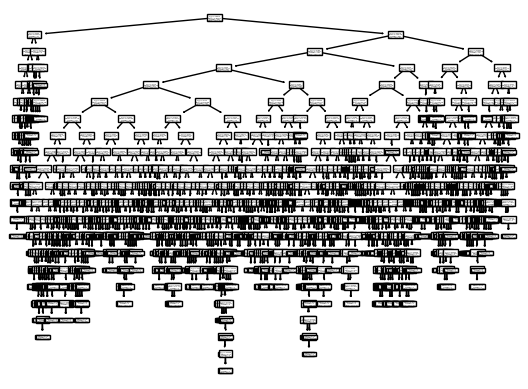

In [340]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [342]:
y_pred = regressor.predict(x_test) 

In [344]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test,y_pred)

In [346]:
r2_score

0.6653613264369636

In [37]:
result

array([65200.33])